In [1]:
# =============================
# IMPORTS
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import GPT2TokenizerFast
import tiktoken

In [2]:
# =============================
# STEP 1: LOAD CLEANED DATA
# =============================
file_path = "/kaggle/input/vidhikaryafinal/vidhikarya_relevant_columns.csv"  # change path if needed
df = pd.read_csv(file_path)

In [3]:
# =============================
# STEP 2: BASIC CLEANING
# =============================
# Ensure 'Number of Ans' column is numeric
df['Number of Ans'] = pd.to_numeric(df['updated_no_of_answers'], errors='coerce').fillna(0).astype(int)

In [4]:
# =============================
# STEP 3: ANALYSIS — Distribution of No. of Answers
# =============================
answer_distribution = df['Number of Ans'].value_counts().sort_index()

print("📈 Distribution of questions by number of answers:")
print(answer_distribution)
print("\nMaximum number of answers a question has:", df['Number of Ans'].max())

📈 Distribution of questions by number of answers:
Number of Ans
0       613
1     10343
2     12930
3      6717
4      3356
5      1803
6      1083
7       586
8       273
9       140
10       64
11       26
12       13
13       10
14       10
15        1
16        2
19        1
Name: count, dtype: int64

Maximum number of answers a question has: 19


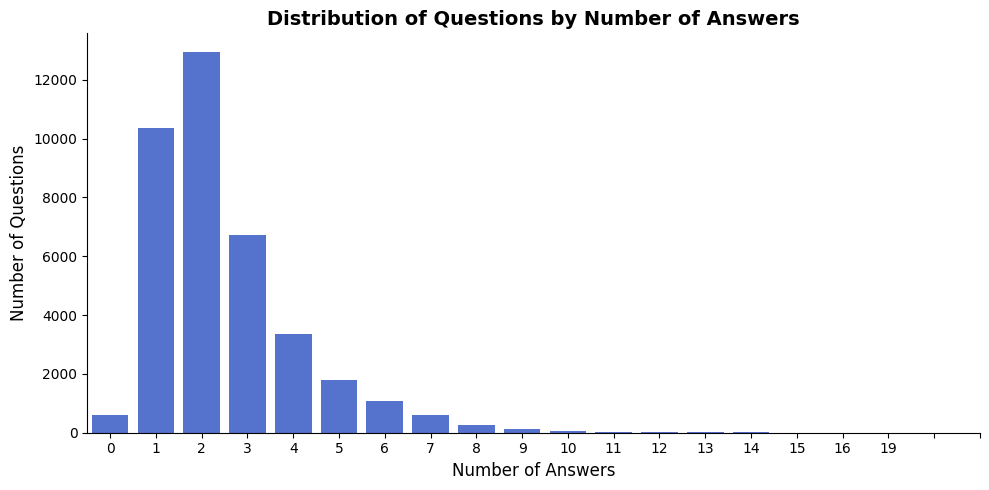

In [5]:
# =============================
# STEP 4 (Updated): Bar Graph — Number of Questions vs. Number of Answers
# =============================
plt.figure(figsize=(10, 5))

# Count how many questions have each "Number of Ans"
answer_counts = df['Number of Ans'].value_counts().sort_index()

# Plot as a simple bar chart
sns.barplot(x=answer_counts.index, y=answer_counts.values, color='royalblue')

plt.title("Distribution of Questions by Number of Answers", fontsize=14, weight='bold')
plt.xlabel("Number of Answers", fontsize=12)
plt.ylabel("Number of Questions", fontsize=12)

# Ensure x-axis ticks are whole numbers separated by 1
plt.xticks(range(int(df['Number of Ans'].min()), int(df['Number of Ans'].max()) + 1), fontsize=10)

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


In [6]:
# =============================
# STEP 5: Category-wise Question Count
# =============================
category_counts = df['Category'].value_counts()

print("\n📊 Number of questions per Category:")
print(category_counts)
print("\nTotal number of unique categories:", df['Category'].nunique())



📊 Number of questions per Category:
Category
Property                                                                                                                                          6008
Civil                                                                                                                                             3885
Employment and Labour                                                                                                                             2912
Family                                                                                                                                            2270
Criminal                                                                                                                                          2126
                                                                                                                                                  ... 
the women to demand astronomical amounts as alim

/tmp/ipykernel_13/1993664492.py:10: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13/1993664492.py:10: UserWarning: Glyph 151 (\x97) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_13/1993664492.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


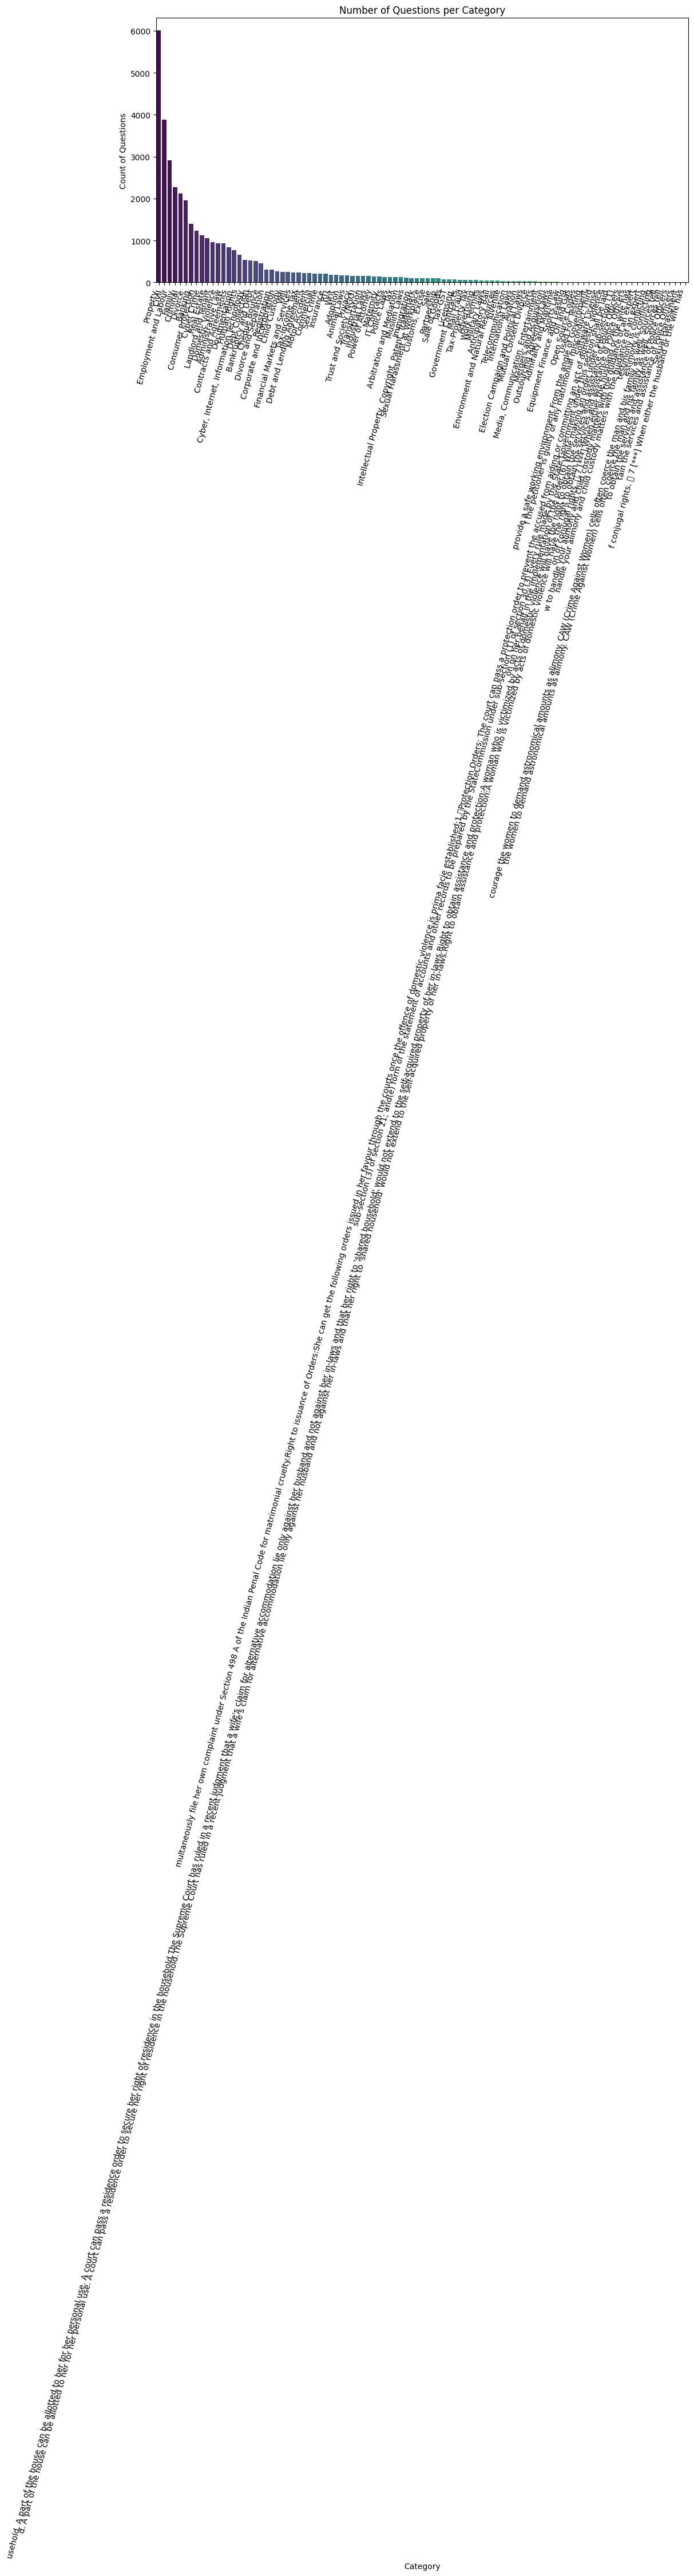

In [7]:
# =============================
# STEP 6: PLOT — Bar Chart of Categories
# =============================
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Questions per Category")
plt.xlabel("Category")
plt.ylabel("Count of Questions")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# =============================
# STEP 2: SETUP TOKENIZER
# =============================
enc = tiktoken.get_encoding("gpt2")

In [9]:
# =============================
# STEP 3: FUNCTION TO CALCULATE LENGTHS
# =============================

def get_response_lengths(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        return [], []
    
    # Split responses by triple pipes
    responses = [r.strip() for r in text.split("|||") if r.strip()]
    
    word_lengths = [len(r.split()) for r in responses]
    token_lengths = [len(enc.encode(r)) for r in responses]
    
    return word_lengths, token_lengths

In [10]:
# =============================
# STEP 4: APPLY TO ALL ROWS
# =============================
all_word_lengths = []
all_token_lengths = []

for text in df["updated_answers"]:
    words, tokens = get_response_lengths(text)
    all_word_lengths.extend(words)
    all_token_lengths.extend(tokens)

In [11]:
# =============================
# STEP 5: SUMMARY STATS
# =============================
def summary_stats(arr):
    return {
        "Average": np.mean(arr),
        "Median": np.median(arr),
        "Maximum": np.max(arr)
    }

word_stats = summary_stats(all_word_lengths)
token_stats = summary_stats(all_token_lengths)

In [12]:
# =============================
# STEP 6: DISPLAY RESULTS
# =============================
print("📊 RESPONSE LENGTH ANALYSIS\n")

print("— WORD COUNTS —")
for k, v in word_stats.items():
    print(f"{k}: {v:.2f}")

print("\n— TOKEN COUNTS (BPE) —")
for k, v in token_stats.items():
    print(f"{k}: {v:.2f}")

📊 RESPONSE LENGTH ANALYSIS

— WORD COUNTS —
Average: 89.24
Median: 42.00
Maximum: 4909.00

— TOKEN COUNTS (BPE) —
Average: 112.09
Median: 51.00
Maximum: 8211.00


In [13]:
# =============================
# STEP 7: CHECK FOR LONG RESPONSES (> 250 TOKENS)
# =============================

# Count how many responses exceed 250 tokens
num_long_responses = sum(t > 250 for t in all_token_lengths)
percent_long = (num_long_responses / len(all_token_lengths)) * 100

print(f"\n🚀 Number of responses > 250 tokens: {num_long_responses} ({percent_long:.2f}% of total)")



🚀 Number of responses > 250 tokens: 8949 (9.49% of total)
